In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
df_adjusted = pd.read_pickle('../Dataframes/df_compiled_adjusted_daily_temp_gbg_save.pkl')
df_original = pd.read_pickle('../Dataframes/df_compiled_daily_temp_gbg_save.pkl')

In [3]:
df_original

,Datum,Kvalitet,Snittemperatur,Year,Month
0,1944-01-01,G,3.20,1944,1
1,1944-01-02,G,3.60,1944,1
2,1944-01-03,G,2.80,1944,1
3,1944-01-04,G,-4.47,1944,1
4,1944-01-05,G,-1.40,1944,1
...,...,...,...,...,...
29002,2023-06-27,G,18.18,2023,6
29003,2023-06-28,G,19.72,2023,6
29004,2023-06-29,G,19.22,2023,6
29005,2023-06-30,G,17.40,2023,6


In [4]:
def get_first_summer_day_per_year(df, year):    
    for ind, val in df[df['Year'] == year].iterrows():
        if val['Over_10_5_days_in_a_row'] == 1:
            day_of_year = df['day_of_year'][ind-4:ind-3]
            day_of_year = day_of_year.values[0]
            summer_day = pd.to_datetime(f'{year}-{day_of_year}', format='%Y-%j').date()
            return (summer_day, day_of_year)
    return None

In [5]:
def get_first_winter_day_per_year(df, year):    
    for ind, val in df[(df['Year'] == year) & (df['Month'] > 6)].iterrows():
        if val['0_or_under_5_days_in_a_row'] == 1:
            day_of_year = df['day_of_year'][ind-4:ind-3]
            day_of_year = day_of_year.values[0]
            winter_day = pd.to_datetime(f'{year}-{day_of_year}', format='%Y-%j').date()
            print(winter_day)
            return (winter_day, day_of_year)
    return None

In [6]:
first_year = df_original['Year'][0]
last_year = df_original['Year'][-1:].values[0]

Original

In [7]:
df_original['Over_10_5_days_in_a_row'] = 0
df_original['0_or_under_5_days_in_a_row'] = 0
df_original['day_of_year'] = df_original['Datum'].dt.day_of_year

In [8]:
counter = 0

for i in range(1, len(df_original)):
    if df_original['Snittemperatur'].iloc[i] >= 10:
        counter += 1
    else:
        counter = 0
        pass
    if counter == 5:
        df_original['Over_10_5_days_in_a_row'].iloc[i] = 1
        counter = 0
    else:
        pass


C:\Users\olofs\AppData\Local\Temp\ipykernel_16600\4291308707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Over_10_5_days_in_a_row'].iloc[i] = 1
C:\Users\olofs\AppData\Local\Temp\ipykernel_16600\4291308707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['Over_10_5_days_in_a_row'].iloc[i] = 1
C:\Users\olofs\AppData\Local\Temp\ipykernel_16600\4291308707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [9]:
counter = 0

for i in range(1, len(df_original)):
    if df_original['Snittemperatur'].iloc[i] <= 0:
        counter += 1
    else:
        counter = 0
        pass
    if counter == 5:
        df_original['0_or_under_5_days_in_a_row'].iloc[i] = 1
        counter = 0
    else:
        pass

C:\Users\olofs\AppData\Local\Temp\ipykernel_16600\2372199070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['0_or_under_5_days_in_a_row'].iloc[i] = 1
C:\Users\olofs\AppData\Local\Temp\ipykernel_16600\2372199070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_original['0_or_under_5_days_in_a_row'].iloc[i] = 1
C:\Users\olofs\AppData\Local\Temp\ipykernel_16600\2372199070.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Original summer/winter arrival dates

In [10]:
summer_dates_original = []
day_of_summer_arrival_original = []

In [11]:
for i in range(first_year, last_year+1):
    date, day = get_first_summer_day_per_year(df_original, i)
    summer_dates_original.append(date)
    day_of_summer_arrival_original.append(day)

In [12]:
winter_dates_original = []
day_of_winter_arrival_original = []

for i in range(first_year, last_year+1):
    if get_first_winter_day_per_year(df_original, i) == None:
        date = pd.to_datetime(f'{i}-10-01')
        day = date.day_of_year
        winter_dates_original.append(date.date())
        day_of_winter_arrival_original.append(day)
    else:
        date, day = get_first_winter_day_per_year(df_original, i)
        winter_dates_original.append(date)
        day_of_winter_arrival_original.append(day)

1946-12-13
1946-12-13
1947-11-14
1947-11-14
1948-12-24
1948-12-24
1950-12-22
1950-12-22
1952-11-25
1952-11-25
1954-11-18
1954-11-18
1955-12-09
1955-12-09
1956-11-18
1956-11-18
1957-12-09
1957-12-09
1958-12-09
1958-12-09
1959-12-05
1959-12-05
1960-12-08
1960-12-08
1961-12-12
1961-12-12
1962-12-13
1962-12-13
1963-12-04
1963-12-04
1964-12-25
1964-12-25
1965-11-11
1965-11-11
1966-12-11
1966-12-11
1967-12-07
1967-12-07
1968-11-04
1968-11-04
1969-12-03
1969-12-03
1970-12-22
1970-12-22
1973-11-25
1973-11-25
1976-12-11
1976-12-11
1978-12-04
1978-12-04
1979-12-08
1979-12-08
1980-10-31
1980-10-31
1981-12-05
1981-12-05
1983-12-15
1983-12-15
1984-12-27
1984-12-27
1985-11-13
1985-11-13
1986-12-20
1986-12-20
1988-11-29
1988-11-29
1995-11-16
1995-11-16
1996-12-13
1996-12-13
1997-11-24
1997-11-24
1998-11-16
1998-11-16
1999-12-12
1999-12-12
2000-12-23
2000-12-23
2001-12-20
2001-12-20
2002-12-06
2002-12-06
2003-10-22
2003-10-22
2005-11-17
2005-11-17
2009-12-16
2009-12-16
2010-11-23
2010-11-23
2012-11-30

Adjusted summer/winter arrival dates

In [13]:
summer_dates_adjusuted = []
day_of_summer_arrival_adjusted = []

for i in range(first_year, last_year+1):
    date, day = get_first_summer_day_per_year(df_adjusted, i)
    summer_dates_adjusuted.append(date)
    day_of_summer_arrival_adjusted.append(day)

In [14]:
winter_dates_adjusted = []
day_of_winter_arrival_adjusted = []

for i in range(first_year, last_year+1):
    if get_first_winter_day_per_year(df_adjusted, i) == None:
        date = pd.to_datetime(f'{i}-10-01')
        day = date.day_of_year
        winter_dates_adjusted.append(date.date())
        day_of_winter_arrival_adjusted.append(day)
    else:
        date, day = get_first_winter_day_per_year(df_adjusted, i)
        winter_dates_adjusted.append(date)
        day_of_winter_arrival_adjusted.append(day)


1946-12-13
1946-12-13
1947-11-14
1947-11-14
1948-12-24
1948-12-24
1950-12-22
1950-12-22
1952-11-25
1952-11-25
1954-11-18
1954-11-18
1955-12-09
1955-12-09
1956-11-18
1956-11-18
1957-12-09
1957-12-09
1958-12-09
1958-12-09
1959-12-05
1959-12-05
1960-12-08
1960-12-08
1961-12-12
1961-12-12
1962-12-13
1962-12-13
1963-12-04
1963-12-04
1964-12-25
1964-12-25
1965-11-11
1965-11-11
1966-12-11
1966-12-11
1967-12-07
1967-12-07
1968-11-04
1968-11-04
1969-12-03
1969-12-03
1970-12-22
1970-12-22
1973-11-25
1973-11-25
1976-12-11
1976-12-11
1978-12-04
1978-12-04
1979-12-08
1979-12-08
1980-10-31
1980-10-31
1981-12-05
1981-12-05
1983-12-15
1983-12-15
1984-12-27
1984-12-27
1985-11-13
1985-11-13
1986-12-20
1986-12-20
1988-11-29
1988-11-29
1995-11-16
1995-11-16
1996-12-13
1996-12-13
1997-11-24
1997-11-24
1998-11-16
1998-11-16
1999-12-12
1999-12-12
2000-12-23
2000-12-23
2001-12-20
2001-12-20
2002-12-06
2002-12-06
2003-10-22
2003-10-22
2005-11-17
2005-11-17
2007-11-11
2007-11-11
2008-11-21
2008-11-21
2009-12-16

Prepare to make plots show dates (Summer)

In [15]:
first_day = datetime(1944, 1, 1)
# iss = first_day+timedelta(days=99)


In [16]:
ticlist_summer = [100, 110, 120, 130, 140, 150, 160]
datelist_summer = []
for i in ticlist_summer:
    datenum = first_day+timedelta(days=i-1)
    month = datenum.strftime('%m')
    day = datenum.strftime('%d')
    datelist_summer.append(f'{month}-{day}')

Prepare to make plots show dates (Winter)

In [17]:
ticlist_winter = [265, 285, 305, 325, 345, 365]
datelist_winter = []
for i in ticlist_winter:
    datenum = first_day+timedelta(days=i-1)
    month = datenum.strftime('%m')
    day = datenum.strftime('%d')
    datelist_winter.append(f'{month}-{day}')

Plot original summer arrival

In [18]:
summer_years_original = []

for i in summer_dates_original:
    year = int(i.year)
    summer_years_original.append(year)

In [19]:
df_summer_arrival_original = pd.DataFrame({'Year': summer_years_original, 'Day_no': day_of_summer_arrival_original})

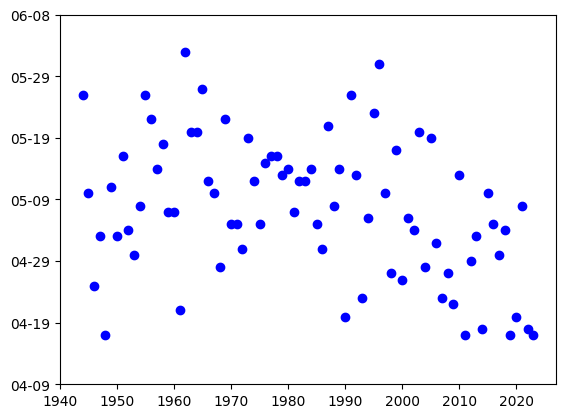

In [20]:
plt.figure

plt.scatter(x=df_summer_arrival_original['Year'], y=df_summer_arrival_original['Day_no'], c='b')
plt.yticks(ticks=ticlist_summer, labels=datelist_summer)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.show()


Plot adjusted summer arrival

In [21]:
summer_years_adjusted = []

for i in summer_dates_adjusuted:
    year = int(i.year)
    summer_years_adjusted.append(year)


In [22]:
df_summer_arrival_adjusted = pd.DataFrame({'Year': summer_years_adjusted, 'Day_no': day_of_summer_arrival_adjusted})

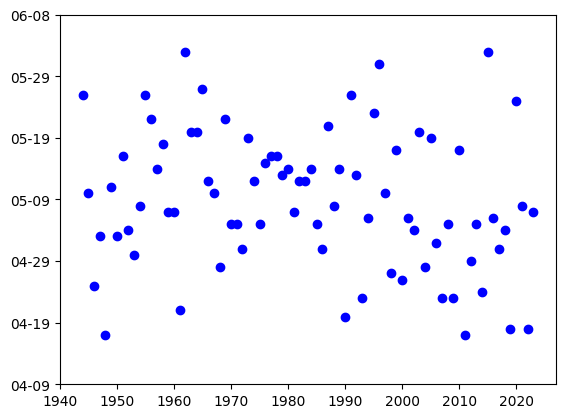

In [23]:
plt.figure

plt.scatter(x=df_summer_arrival_adjusted['Year'], y=df_summer_arrival_adjusted['Day_no'], c='b')
plt.yticks(ticks=ticlist_summer, labels=datelist_summer)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.show()

Plot original winter arrival

In [24]:
winter_years_original = []

for i in winter_dates_original:
    year = int(i.year)
    winter_years_original.append(year)

In [25]:
df_winter_arrival_original = pd.DataFrame({'Year': winter_years_original, 'Day_no': day_of_winter_arrival_original})

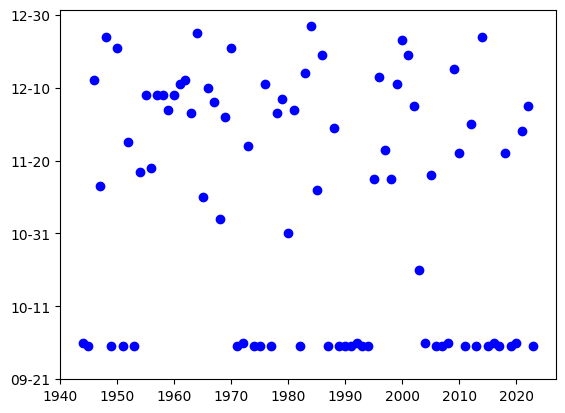

In [26]:
plt.figure

plt.scatter(x=df_winter_arrival_original['Year'], y=df_winter_arrival_original['Day_no'], c='b')
plt.yticks(ticks=ticlist_winter, labels=datelist_winter)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.show()

Plot adjusted winter arrival

In [27]:
winter_years_adjusted = []

for i in winter_dates_adjusted:
    year = int(i.year)
    winter_years_adjusted.append(year)

In [28]:
df_winter_arrival_adjusted = pd.DataFrame({'Year': winter_years_adjusted, 'Day_no': day_of_winter_arrival_adjusted})

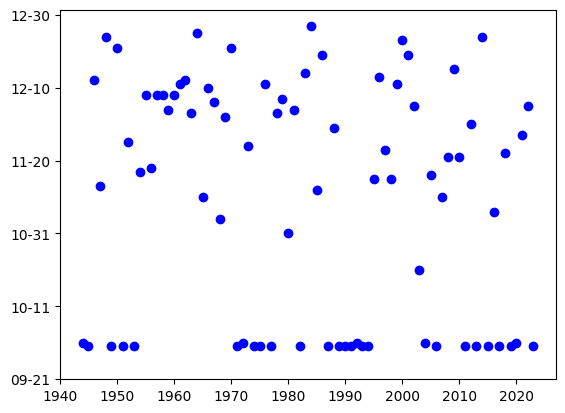

In [29]:
plt.figure

plt.scatter(x=df_winter_arrival_adjusted['Year'], y=df_winter_arrival_adjusted['Day_no'], c='b')
plt.yticks(ticks=ticlist_winter, labels=datelist_winter)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.show()

Compare

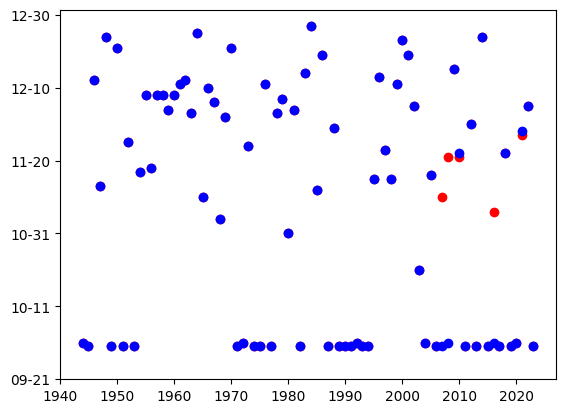

In [30]:
plt.figure

plt.scatter(x=df_winter_arrival_adjusted['Year'], y=df_winter_arrival_adjusted['Day_no'], c='r')
plt.scatter(x=df_winter_arrival_original['Year'], y=df_winter_arrival_original['Day_no'], c='b')
plt.yticks(ticks=ticlist_winter, labels=datelist_winter)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.show()

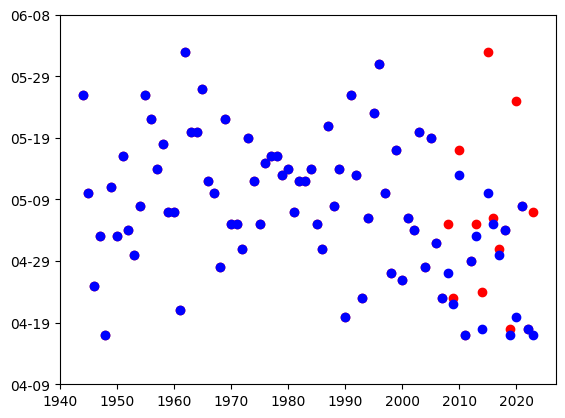

In [31]:
plt.figure

plt.scatter(x=df_summer_arrival_adjusted['Year'], y=df_summer_arrival_adjusted['Day_no'], c='r')
plt.scatter(x=df_summer_arrival_original['Year'], y=df_summer_arrival_original['Day_no'], c='b')
plt.yticks(ticks=ticlist_summer, labels=datelist_summer)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.yticks()
plt.show()

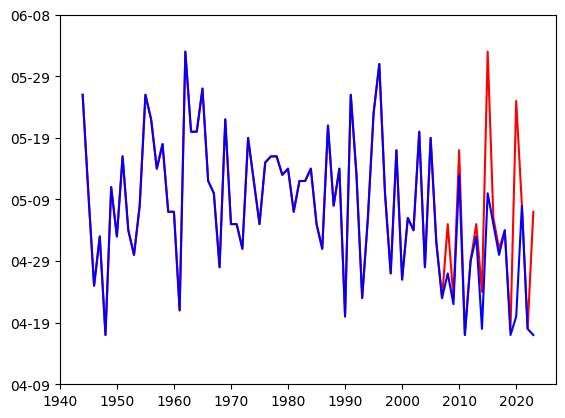

In [32]:
plt.figure
plt.plot(df_summer_arrival_adjusted['Year'], df_summer_arrival_adjusted['Day_no'], 'r')
plt.plot(df_summer_arrival_original['Year'], df_summer_arrival_original['Day_no'], 'b')
plt.yticks(ticks=ticlist_summer, labels=datelist_summer)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])
plt.show()

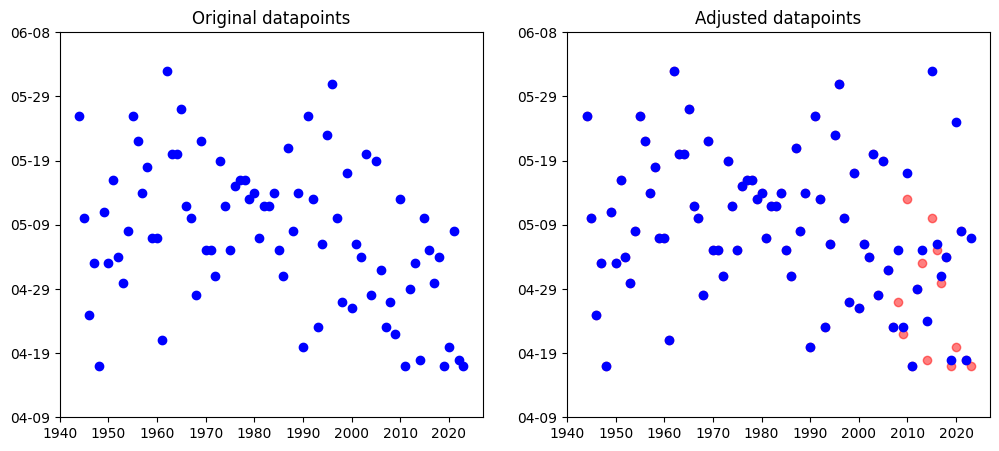

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Original datapoints')
plt.scatter(x=df_summer_arrival_original['Year'], y=df_summer_arrival_original['Day_no'], c='b')
plt.yticks(ticks=ticlist_summer, labels=datelist_summer)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])


plt.subplot(1, 2, 2)
plt.title('Adjusted datapoints')
plt.scatter(x=df_summer_arrival_original['Year'], y=df_summer_arrival_original['Day_no'], c='r', alpha=0.5)
plt.scatter(x=df_summer_arrival_adjusted['Year'], y=df_summer_arrival_adjusted['Day_no'], c='b')
plt.yticks(ticks=ticlist_summer, labels=datelist_summer)
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])

plt.show()

Plot only temperatures

In [34]:
df_month_original = pd.read_pickle('../Dataframes/df_compiled_monthly_temp_gbg_save.pkl')
df_month_adjusted = df_adjusted.groupby(['Year', 'Month'])['Snittemperatur'].mean().round(2).reset_index()

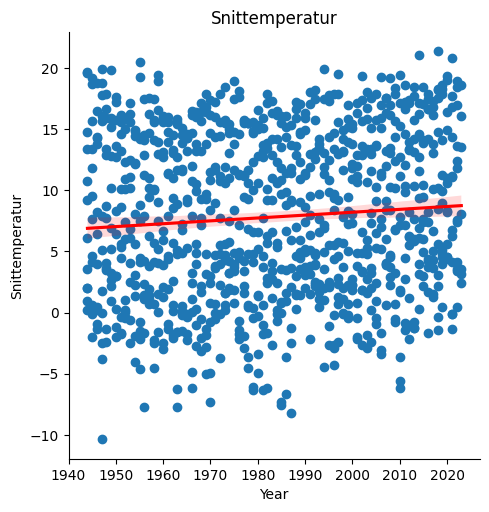

In [35]:
sns.lmplot(df_month_original, x='Year', y='Snittemperatur', line_kws={'color' : 'red'}, scatter_kws={'alpha': 1})
plt.title('Snittemperatur')
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])

plt.show()

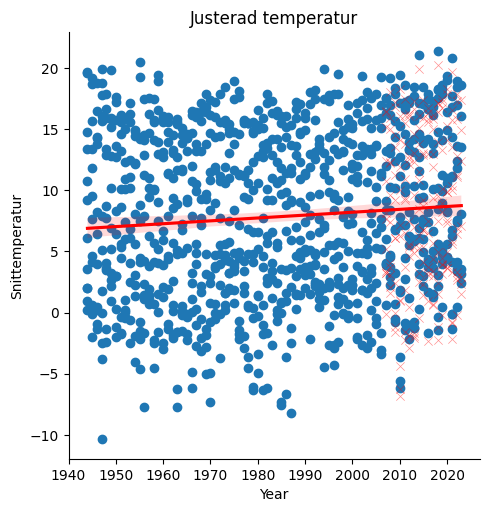

In [36]:
sns.lmplot(df_month_original, x='Year', y='Snittemperatur', line_kws={'color' : 'red'}, scatter_kws={'alpha': 1})
sns.scatterplot(data=df_month_adjusted[df_month_adjusted['Year'] > 2006], x='Year', y='Snittemperatur', c='r', alpha=0.45, marker='x')
plt.title('Justerad temperatur')
# plt.scatter(x=df_month_adjusted['Year'], y=df_month_adjusted['Snittemperatur'], c='b')
plt.xticks(ticks=[1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020])

plt.show()

Try to get both lines in the same plot

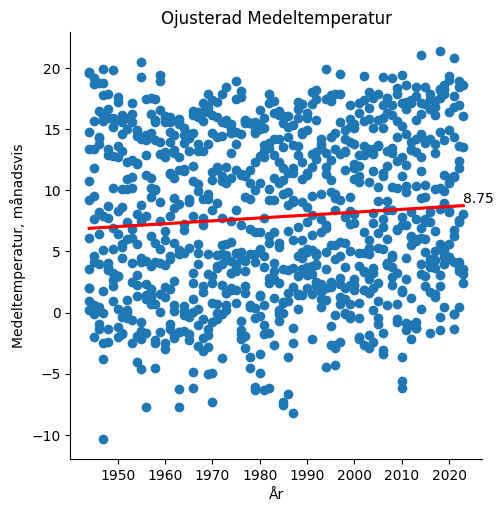

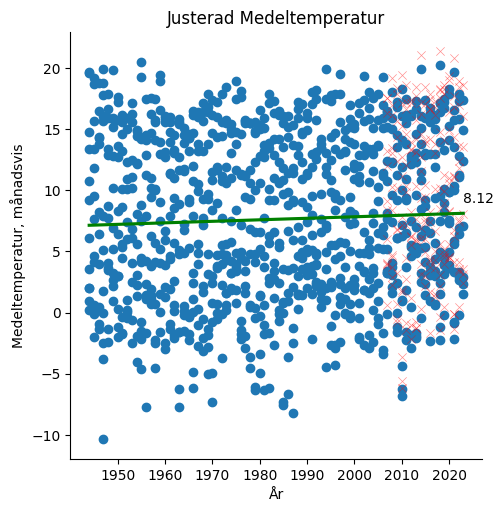

In [45]:
lmOriginal = sns.lmplot(df_month_original, x='Year', y='Snittemperatur', line_kws={'color' : 'red'}, scatter_kws={'alpha': 1}, ci=None)
slope, intercept_org = lmOriginal.ax.lines[0].get_data()
plt.text(x=2023, y=9, s=intercept_org.max().round(2))
plt.ylabel('Medeltemperatur, månadsvis')
plt.xlabel('År')
plt.title('Ojusterad Medeltemperatur')
lmAdjusted = sns.lmplot(df_month_adjusted, x='Year', y='Snittemperatur', line_kws={'color' : 'green'}, scatter_kws={'alpha': 1}, ci=None)
slope, intercept_adj = lmAdjusted.ax.lines[0].get_data()
plt.text(x=2023, y=9, s=intercept_adj.max().round(2))
plt.ylabel('Medeltemperatur, månadsvis')
plt.xlabel('År')
plt.title('Justerad Medeltemperatur')
sns.scatterplot(data=df_month_original[df_month_original['Year'] > 2006], x='Year', y='Snittemperatur', c='r', alpha=0.45, marker='x')
plt.show()


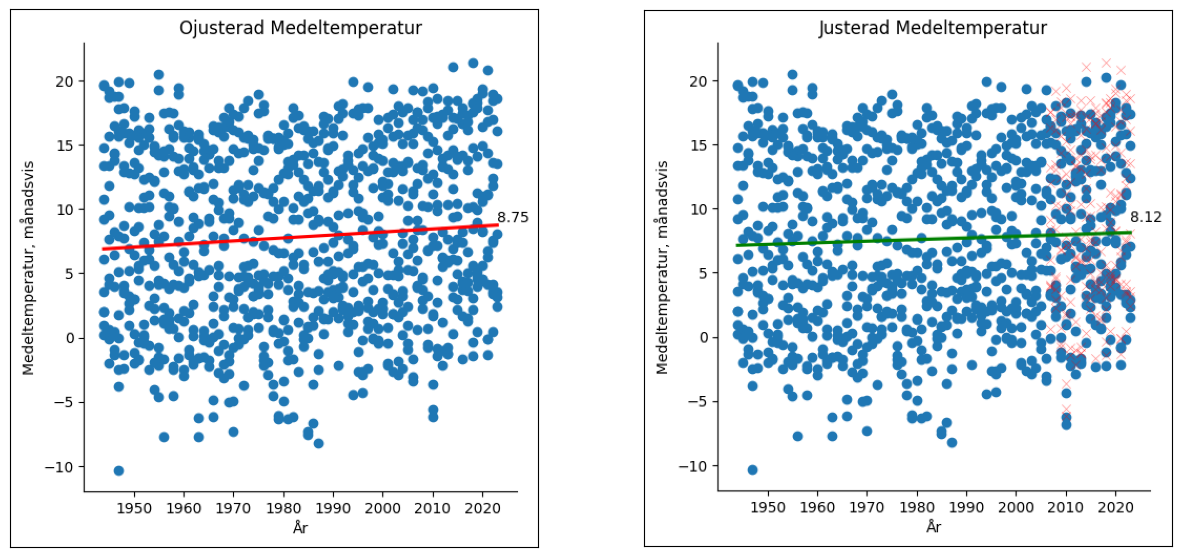

In [46]:
plt.figure(figsize=(15, 9))
plt.subplot(1, 2, 1)
img1 = plt.imread('../plottar/ojusterad_medeltemp.png')
plt.yticks(ticks=[])
plt.xticks(ticks=[])
plt.imshow(img1)
plt.subplot(1, 2, 2)
img2 = plt.imread('../plottar/justerad_medeltemp.png')
plt.yticks(ticks=[])
plt.xticks(ticks=[])
plt.imshow(img2)
plt.show()